In [1]:
# IMPORTS :

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# DATABASE :

data = pd.read_csv('DATABASE.txt', sep=";", header=None, na_values=['?'])

data = data[:5000]

data = data.rename(columns=data.iloc[0]).drop(data.index[0])

data["Time_index2"] = data["Date"] + " " + data["Time"]

data["timestamp"] = pd.to_datetime(data['Time_index2'], format='%d/%m/%Y %H:%M:%S')
data.set_index(['timestamp'],inplace=True)

data["Global_active_power"] = data["Global_active_power"].astype(float)

data.head()

df = pd.DataFrame(data, columns=['Global_active_power'])

df = df.rename(columns={'Global_active_power': 'Y'})

data = df

df = df[:1261]

df.head()

C:\Users\bapti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Y
timestamp,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [3]:
# Data Normalization :

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

df = scaler.fit_transform(df)
df

array([[0.53466667],
       [0.6872    ],
       [0.68906667],
       ...,
       [0.2552    ],
       [0.25546667],
       [0.25493333]])

In [4]:
features_set = []
labels = []

# On fait des groupes de 60
# (l'article disait que por prévoir les stocks d'Apple c'est ce qu'il avait de meilleur avec ses test)
for i in range(60, 1260):
    features_set.append(df[i-60:i, 0])
    labels.append(df[i, 0])

features_set, labels = np.array(features_set), np.array(labels)

# On formate les données pour le LSTM :
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [5]:
# Le LSTM :

# IMPORTS :

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [6]:
# Création :

# Classe du modèle :
model = Sequential()

# Layer 1 - LSTM 50 units:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

# Dropout :
# On oublie constamment une partie pour éviter le surentraînement
model.add(Dropout(0.2))

# On ajoute de la même manière 3 autre couche :
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# On veut une sortie on mets donc une couche dense avec 1 neurone en sortie
model.add(Dense(units = 1))

In [7]:
# Compilation du LSTM :

# On utilise l'optimiseur adam
# Erreur quadratique moyenne comme fonction d'ajustement

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
# Entraînement du modèle :

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 78ms/step - loss: 0.0250
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0181
Epoch 3/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0178
Epoch 4/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0176
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0165
Epoch 6/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0166
Epoch 7/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0164
Epoch 8/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0153
Epoch 9/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0148
Epoch 10/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0144
Epoch 11/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0143
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0146
Epoch 13/100
38/38 [=====

38/38 [==============================] - 4s 97ms/step - loss: 0.0118


In [9]:
# Préparation des données de test :

test_inputs = data['Y'][1261 - 60:].values

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

# Mise au format 3D :
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

test_features

C:\Users\bapti\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[[0.1656    ],
        [0.1648    ],
        [0.16533333],
        ...,
        [0.2552    ],
        [0.25546667],
        [0.25493333]],

       [[0.1648    ],
        [0.16533333],
        [0.16533333],
        ...,
        [0.25546667],
        [0.25493333],
        [0.25333333]],

       [[0.16533333],
        [0.16533333],
        [0.16453333],
        ...,
        [0.25493333],
        [0.25333333],
        [0.25733333]],

       ...,

       [[0.21573333],
        [0.2152    ],
        [0.21386667],
        ...,
        [0.25493333],
        [0.25386667],
        [0.25386667]],

       [[0.2152    ],
        [0.21386667],
        [0.21386667],
        ...,
        [0.25386667],
        [0.25386667],
        [0.25386667]],

       [[0.21386667],
        [0.21386667],
        [0.21333333],
        ...,
        [0.25386667],
        [0.25386667],
        [0.2536    ]]])

In [10]:
# Prédiction :

predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

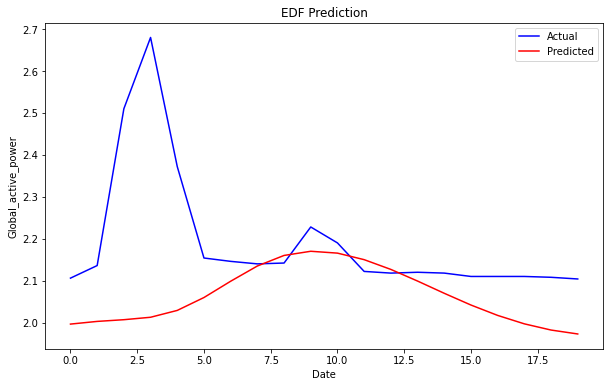

In [11]:
# Affichage :

plt.figure(figsize=(10,6))
plt.plot(data['Y'][1261:1281].values, color='blue', label='Actual')
plt.plot(predictions , color='red', label='Predicted')
plt.title('EDF Prediction')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

